<a href="https://colab.research.google.com/github/leonardoborck/bankChurnPrediction/blob/main/docs/kdd_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Acadêmicos: 
Leonardo Borck da Silveira, Luiz Felipe Cipriani Morfelle e Victor Trindade de Carvalho

#Seleção da Database
##Database:
Churn for Bank Customers Public Database https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers?resource=download&select=churn.csv

###Descrição:
A database, provida por data.world que uma empresa que tem como propósito ser um catálogo de dados corporativos para a pilha de dados moderna, contém dados de dez mil clientes e ex-clientes de um banco, com isso temos como objetivo neste projeto foi desenvolver um modelo de previsão de churn usando algoritmos de aprendizado de máquina.

###Problema de Negócio:
Quais são os principais fatores que impactam no desligamento do cliente em um banco? Como prever quais clientes possívelmente irão se desligar do banco?

- Quantidade de atributos: 14; 
- Quantidade de registros: 10.0k;

###Atributos:
- Surname: Sobrenome
- CreditScore: Score de Crédito
- Geography: País (Germany / France / Spain)
- Gender: Gênero (Female / Male)
- Age: Idade
- Tenure: Quantos anos é cliente do banco
- Balance: Saldo da conta
- NumOfProducts: Número de serviços que o cliente possui
- HasCrCard: Se possui cartão de crédito (0 = No, 1 = Yes)
- IsActiveMember: Se é cliente ativo no banco (0 = No, 1 = Yes)
- EstimatedSalary: Estimativa salarial anual
- Exited: Se abandonou o banco (0 = No, 1 = Yes)

###Perguntas: 
1. Qual a idade de pessoas que mais realizam churn no banco? (São os jovens?)
1. Existe correlação de algum dos serviços oferecidos pelo banco com o índice de churn?
1. Quais são os atributos com maior impacto na incidencia de churn?
1. Podemos utilizar algum algoritmo de machine learning para desenvolver um modelo de predição do churn?
1. Qual a acurácia será obtida caso conseguigamos fazer predição do churn?

###Inicialização

In [1]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 76 kB/s 


In [73]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV,train_test_split,cross_val_score
import itertools
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import LocalOutlierFactor # çok değişkenli aykırı gözlem incelemesi
from sklearn.preprocessing import scale,StandardScaler, MinMaxScaler,Normalizer,RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);  # to display all columns and rows
pd.set_option('display.float_format', lambda x: '%.2f' % x) # The number of numbers that will be shown after the comma.

In [101]:
df = pd.read_csv("churn.csv", index_col=0)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


###Análise Exploratória (EDA)


1. Pré-Processamento

In [102]:
dependent_variable_name = "Exited"

In [103]:
def data_prepare():
    df_prep = df.copy()
    
    
    missing_value_len = df.isnull().any().sum()
    if missing_value_len == 0:
        print("No Missing Value")
    else:
        print("Investigate Missing Value, Missing Value : " + str(missing_value_len))
    print("\n")
    
    show_unique_count_variables(df = df_prep)
    
    
    df_prep['Tenure'] =  df_prep.Tenure.astype(np.float)
    df_prep['NumOfProducts'] =  df_prep.NumOfProducts.astype(np.float)
    return df_prep

Valor único da representação de todas as variáveis:

In [104]:
def show_unique_count_variables(df):
    for index, value in df.nunique().items():
        print(str(index) + "\n\t\t\t:" + str(value))

2. Analise de Outlier (Método LOF  e Supressão)

  -  Edição de Outlier

In [105]:
def show_outliers(df):
    
    #observing outlier features by looking up all columns
    
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    df_num_cols = df.select_dtypes(include=numerics)
    sns.set(font_scale = 0.7) 
    fig, axes = plt.subplots(nrows = 2, ncols = 5, gridspec_kw =  dict(hspace=0.3), figsize = (12,9))
    fig.tight_layout()
    for ax,col in zip(axes.flatten(), df_num_cols.columns):
        sns.boxplot(x = df_num_cols[col], color='green', ax = ax)
    fig.suptitle('Observing Outliers', color = 'r', fontsize = 14)

- Visualização de outliers de acordo com método LOF

In [106]:
def lof_observation(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    df_num_cols = df.select_dtypes(include=numerics)
    df_outlier = df_num_cols.astype("float64")
    clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)
    clf.fit_predict(df_outlier)
    df_scores = clf.negative_outlier_factor_
    scores_df = pd.DataFrame(np.sort(df_scores))
    
    scores_df.plot(stacked=True, xlim = [0,20], color='r', title='Visualization of outliers according to the LOF method', style = '.-');                # first 20 observe
    th_val = np.sort(df_scores)[2]
    outliers = df_scores > th_val
    df = df.drop(df_outlier[~outliers].index)
    df.shape
    return df

-  Supressão de Outlier

In [107]:
def clear_outliers(df):
    
    #age and credit_score suppression
    
    Q1 = df["Age"].quantile(0.25)
    Q3 = df["Age"].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    print("When age and credit score is printed below lower score: ", lower, "and upper score: ", upper)
    df_outlier = df["Age"][(df["Age"] > upper)]
    df["Age"][df_outlier.index] = upper
    
    
    #credit_score
    
    Q1 = df["CreditScore"].quantile(0.25)
    Q3 = df["CreditScore"].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    print("When age and credit score is printed above lower score: ", lower, "and upper score: ", upper)
    df_outlier = df["CreditScore"][(df["CreditScore"] < lower)]
    df["CreditScore"][df_outlier.index] = lower
    
    return df

-  Processo de Outiler

In [108]:
def outlier_process(df):
    #show_outliers(df = df)
    df_outlier = lof_observation(df = df)
    df_outlier = clear_outliers(df = df_outlier)
    return df_outlier

In [109]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


3. Análise dos dados / Classificação

- Distribuição de dependência de variável

In [110]:
def show_dependent_variable(df):
#     sns.countplot(data = df, x = dependent_variable_name, label = 'Count') \
#     .set_title(dependent_variable_name + ' dependent variable situation', fontsize = 18, color = 'r')
    fig, axarr = plt.subplots(2, 3, figsize=(18, 6))
    sns.countplot(x = 'Geography', hue = 'Exited',data = df, ax = axarr[0][0])
    sns.countplot(x = 'Gender', hue = 'Exited',data = df, ax = axarr[0][1])
    sns.countplot(x = 'HasCrCard', hue = 'Exited',data = df, ax = axarr[0][2])
    sns.countplot(x = 'IsActiveMember', hue = 'Exited',data = df, ax = axarr[1][0])
    sns.countplot(x = 'NumOfProducts', hue = 'Exited',data = df, ax = axarr[1][1])
    sns.countplot(x = 'Tenure', hue = 'Exited',data = df, ax = axarr[1][2])
    zero, one = df[dependent_variable_name].value_counts()
    print("Dependent variable distribution;")
    print(dependent_variable_name + " 0 count:", zero)
    print(dependent_variable_name + " 1 count:", one)

- Observação de distribuição das colunas numéricas

In [111]:
def show_numeric_columns_distributions(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    df_num_cols = df.select_dtypes(include=numerics)
    columns = df_num_cols.columns[: len(df_num_cols.columns)]
    fig = plt.figure()
    fig.set_size_inches(18, 15)
    #plt.subplots(figsize=(22,22))
    length = len(columns)
    for i,j in itertools.zip_longest(columns, range(length)):
        plt.subplot((length / 2), 3, j+1)
        plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
        df_num_cols[i].hist(bins = 20, edgecolor = 'black')
        plt.title(i)
    fig = fig.suptitle('Structures of numeric variables', color = 'r' ,fontsize = 18)
    plt.show()

- Status de outras variáveis de acordo com a dependências

In [112]:
def show_dependent_variable_cross_others_distributions(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    df_dependent_var = df[df[dependent_variable_name] == 1]
    df_num_cols = df_dependent_var.select_dtypes(include = numerics)
    columns = df_num_cols.columns[: len(df_num_cols.columns)]
    
    fig = plt.figure()
    fig.set_size_inches(18, 15)
    length = len(columns)
    for i,j in itertools.zip_longest(columns, range(length)):
        plt.subplot((length / 2), 3, j+1)
        plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
        df_num_cols[i].hist(bins = 20, edgecolor = 'black')
        plt.title(i)
    fig = fig.suptitle(dependent_variable_name + ' Status of other variables according to 1 dependent variable', color = 'r', fontsize = 18)
    plt.show()

- Categorização de variáveis de acordo com a dependência das mesmas

In [113]:
def show_dependent_variable_cross_categorical_distributions(df, categorical_columns):
    sns.set(font_scale = 0.7) 
    fig, axes = plt.subplots(nrows = int( len(categorical_columns) / 2 ) , ncols = 2, figsize = (7,9))
    fig.tight_layout()
    for ax,col in zip(axes.flatten(), categorical_columns):
        sns.countplot(x = df[col], hue = dependent_variable_name, data = df, ax = ax)
    fig.suptitle('Categorical variables are monitored according to the dependent variable', color = 'r', fontsize = 1)

- Método de inicio da análise

In [114]:
def show_data_analysis(df):
    show_dependent_variable(df)
    show_numeric_columns_distributions(df)
    show_dependent_variable_cross_others_distributions(df)
    show_dependent_variable_cross_categorical_distributions(df = df_outlier, categorical_columns = ["Gender","Geography","HasCrCard","IsActiveMember"])

###Clusterização

1. Grupamento de Credit Score  (min= 358 and max= 800)

In [115]:
def credit_score_table(row):
    
    credit_score = row.CreditScore
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 851:
        return "Top"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score < 300:
        return "Deep"

2.  Utilização do Produto pela Taxa dependendo do ano

In [116]:
def product_utilization_rate_by_year(row):
    number_of_products = row.NumOfProducts
    tenure = row.Tenure
    
    if number_of_products == 0:
        return 0
    
    if tenure == 0:
        return number_of_products
    
    rate = number_of_products / tenure
    return rate

3. Utilização de produto (taxa) estimada pelo salário

In [117]:
def product_utilization_rate_by_estimated_salary(row):
    number_of_products = row.number_of_products
    estimated_salary = row.EstimatedSalary
    
    if number_of_products == 0:
        return 0

    
    rate = number_of_products / estimated_salary
    return rate

4. Exibição do salário médio por país

In [118]:
def countries_monthly_average_salaries(row):
    #data from https://en.wikipedia.org/wiki/List_of_European_countries_by_average_wage
    fr = 3696    
    de = 4740
    sp = 2257
    salary = row.EstimatedSalary / 12
    country = row.Geography              
    # Germany, France and Spain
    
    if country == 'Germany':
        return salary / de
    elif country == "France":
        return salary / fr
    elif country == "Spain": 
        return salary / sp

5. Método principal que inicia a análise de clusterização

In [119]:
def feature_engineering(df, is_show_graph = False):
    df_fe = df.copy()
    
    #balance_salary_rate
    balance_salary_rate = 'balance_salary_rate'
    df_fe[balance_salary_rate] = df_fe.Balance / df_fe.EstimatedSalary
    
    #product usage rate by year
    df_fe = df_fe.assign(product_utilization_rate_by_year=df_fe.apply(lambda x: product_utilization_rate_by_year(x), axis=1)) 
    
    #Product Usage Rate According to Estimated Mas
    #df_fe = df_fe.assign(product_utilization_rate_by_estimated_salary = df_fe.apply(lambda x: product_utilization_rate_by_estimated_salary(x), axis=1)) 
    
    
    #Standardizing, proportioning by age by customer year - we're kicking off puberty!
    tenure_rate_by_age = 'tenure_rate_by_age'
    df_fe[tenure_rate_by_age] = df_fe.Tenure / (df_fe.Age-17)
    
    #Standardizing and proportioning credit score according to age - we are making adolescence period!
    credit_score_rate_by_age = 'credit_score_rate_by_age'
    df_fe[credit_score_rate_by_age] = df_fe.CreditScore / (df_fe.Age-17)
    
    #ratio of the product used according to the salary, its ratio
    product_utilization_rate_by_salary = 'product_utilization_rate_by_salary'
    #df_fe[product_utilization_rate_by_salary] = df_fe.Tenure / (df_fe.EstimatedSalary)
   
    #credit score product ratio, ratio according to salary
    credit_score_rate_by_salary = 'credit_score_rate_by_salary'
    df_fe[credit_score_rate_by_salary] = df_fe.CreditScore / (df_fe.EstimatedSalary)
    
    #Feature Eng. show the graphs of the generated variables according to the dependent variable?
    if is_show_graph:
        fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,12))
        fig.tight_layout()
        sns.boxplot(y = balance_salary_rate, x = dependent_variable_name, hue = dependent_variable_name, data = df_fe, ax = axes[0][0])
        sns.boxplot(y = product_utilization_rate_by_year, x = dependent_variable_name, hue = dependent_variable_name, data = df_fe, ax = axes[0][1])
        #sns.countplot(x = credit_score_rate_by_age, hue = dependent_variable_name, data = df_fe, ax = axes[1][0])
        #sns.countplot(x = credit_score_rate_by_age, hue = dependent_variable_name, data = df_fe, ax = axes[1][1])
        plt.ylim(-1, 5)
    
    
    #feature engineering add- credit scoreboard
    df_fe = df_fe.assign(credit_score_table=df_fe.apply(lambda x: credit_score_table(x), axis=1))
    
    #feature engineering add- average salary situation by countries
    df_fe = df_fe.assign(countries_monthly_average_salaries = df_fe.apply(lambda x: countries_monthly_average_salaries(x), axis=1)) 
    
    return df_fe

###Data Encoding (Transformar valores qualitativos em quantitativos)

In [120]:

def data_encoding(df):
    df_model = df.copy()
    '''
    # It was attempted to reduce the number of 0 observations.
    churn_zero = df_model[df_model.apply(lambda x: True if x['Exited'] == 0 else False , axis=1)]
    df_train = churn_zero.sample(frac=0.1,random_state=100)
    df_model = df_model.drop(df_train.index)
    '''
    
    
    # >>>> Categorical columns <<<<<
    
    non_encoding_columns = ["Geography","HasCrCard","IsActiveMember","Gender","NumOfProducts","Tenure","credit_score_table"]
    
    df_non_encoding = df_model[non_encoding_columns]
    df_model = df_model.drop(non_encoding_columns,axis=1)
    
    
    df_encoding = df_non_encoding.copy()
    
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    df_encoding["gender_category"] = encoder.fit_transform(df_non_encoding.Gender)
    df_encoding["country_category"] = encoder.fit_transform(df_non_encoding.Geography)
    df_encoding["credit_score_category"] = encoder.fit_transform(df_non_encoding.credit_score_table)

    

    df_encoding.reset_index(drop=True, inplace=True)
    df_model.reset_index(drop=True, inplace=True)
    df_model = pd.concat([df_model,df_encoding],axis=1)

    df_model = df_model.drop(["Geography","Gender","CustomerId","Surname","credit_score_table","CreditScore","EstimatedSalary"],axis=1)
    df_model = df_model.reset_index()
    df_model = df_model.drop('index',axis=1)
    
    df_model.loc[df_model.HasCrCard == 0, 'credit_card_situation'] = -1
    df_model.loc[df_model.IsActiveMember == 0, 'is_active_member'] = -1
    return df_model

###Preparação do modelo de predição

In [130]:
def model_prepare(df_model):
    y = df_model[dependent_variable_name]
    X = df_model.loc[:, df_model.columns != dependent_variable_name]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12345)
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform (X_test)
    return X_train, X_test, y_train, y_test

###Inicio do treinamento

In [123]:
def data_training(X_train, X_test, y_train, y_test):

    models = []
    models.append(('LOGR',LogisticRegression()))
    models.append(('KNN',KNeighborsClassifier()))
    models.append(('CART',DecisionTreeClassifier()))
    models.append(('RF',RandomForestClassifier()))
    #models.append(('SVC',SVC()))
    models.append(('GBM',GradientBoostingClassifier()))
    models.append(('XGBoost',XGBClassifier()))
    models.append(('LightGBM',LGBMClassifier()))
    models.append(('CatBoost',CatBoostClassifier()))

    df_result = pd.DataFrame(columns=["model","accuracy_score","scale_method","0_precision","0_recall","1_precision","1_recall"])
    index = 0
    for name,model in models:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test,y_pred)
        class_report = classification_report(y_test,y_pred,digits=2,output_dict=True)
        zero_report = class_report['0']
        one_report = class_report['1']
        df_result.at[index,['model','accuracy_score','scale_method',"0_precision","0_recall","1_precision","1_recall"]] = [name,score,"NA",zero_report['precision'],zero_report['recall'],one_report['precision'],one_report['recall']]
        index += 1
    return df_result.sort_values("accuracy_score",ascending=False)

###Funções úteis (genéricas)

In [124]:
# Function to give best model score and parameters

def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
    
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)


from matplotlib import rc,rcParams
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.rcParams.update({'font.size': 16})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, color="blue")
    plt.yticks(tick_marks, classes, color="blue")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

''' inf yakalama
indices_to_keep = df_encoded.isin([np.nan, np.inf, -np.inf]).any(1)
df_encoded[indices_to_keep].astype(np.float64)
'''

' inf yakalama\nindices_to_keep = df_encoded.isin([np.nan, np.inf, -np.inf]).any(1)\ndf_encoded[indices_to_keep].astype(np.float64)\n'

###Limpeza dos dados

No Missing Value


CustomerId
			:10000
Surname
			:2932
CreditScore
			:460
Geography
			:3
Gender
			:2
Age
			:70
Tenure
			:11
Balance
			:6382
NumOfProducts
			:4
HasCrCard
			:2
IsActiveMember
			:2
EstimatedSalary
			:9999
Exited
			:2
When age and credit score is printed below lower score:  14.0 and upper score:  62.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


When age and credit score is printed above lower score:  383.0 and upper score:  919.0
Dependent variable distribution;
Exited 0 count: 7963
Exited 1 count: 2037


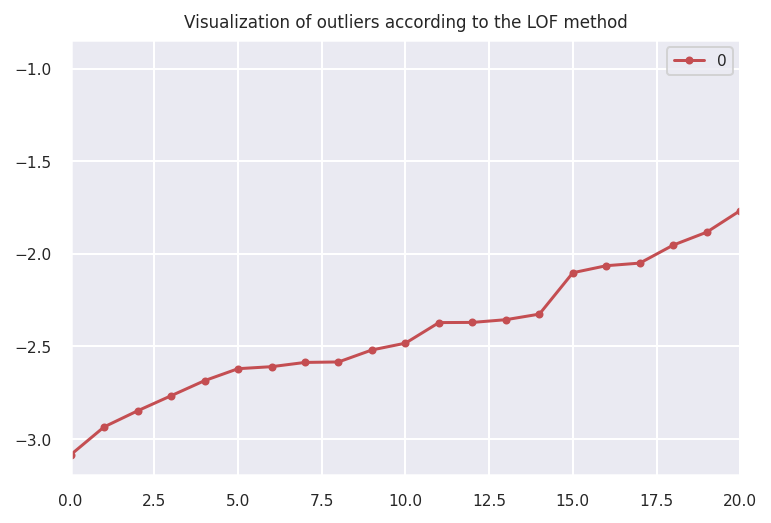

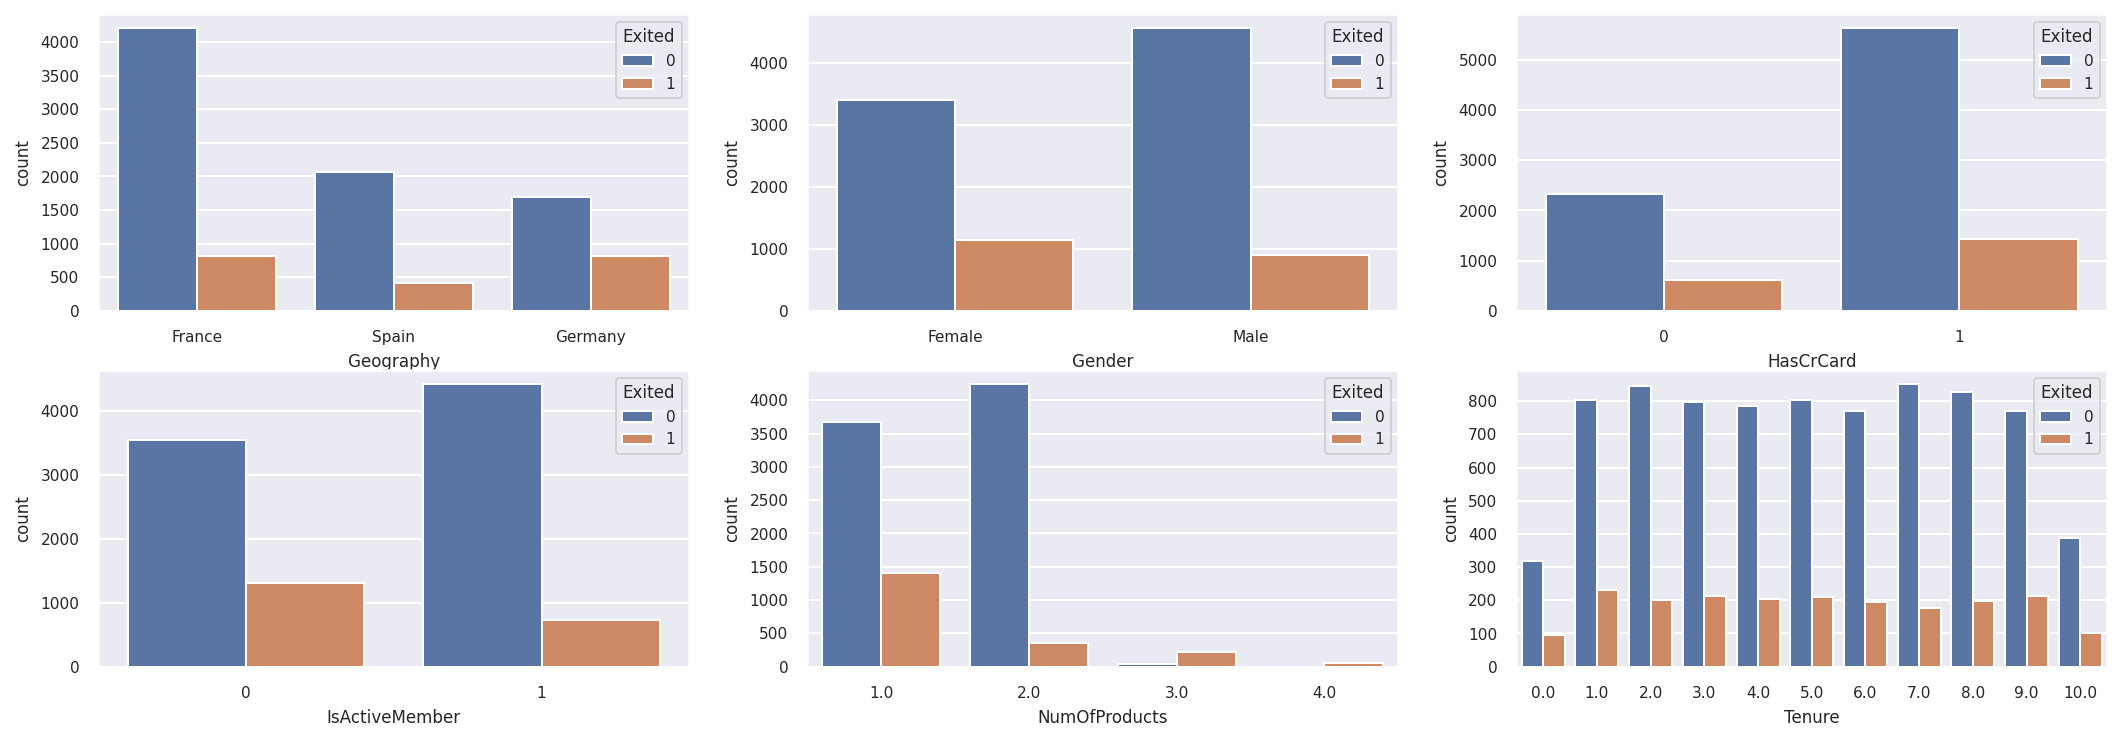

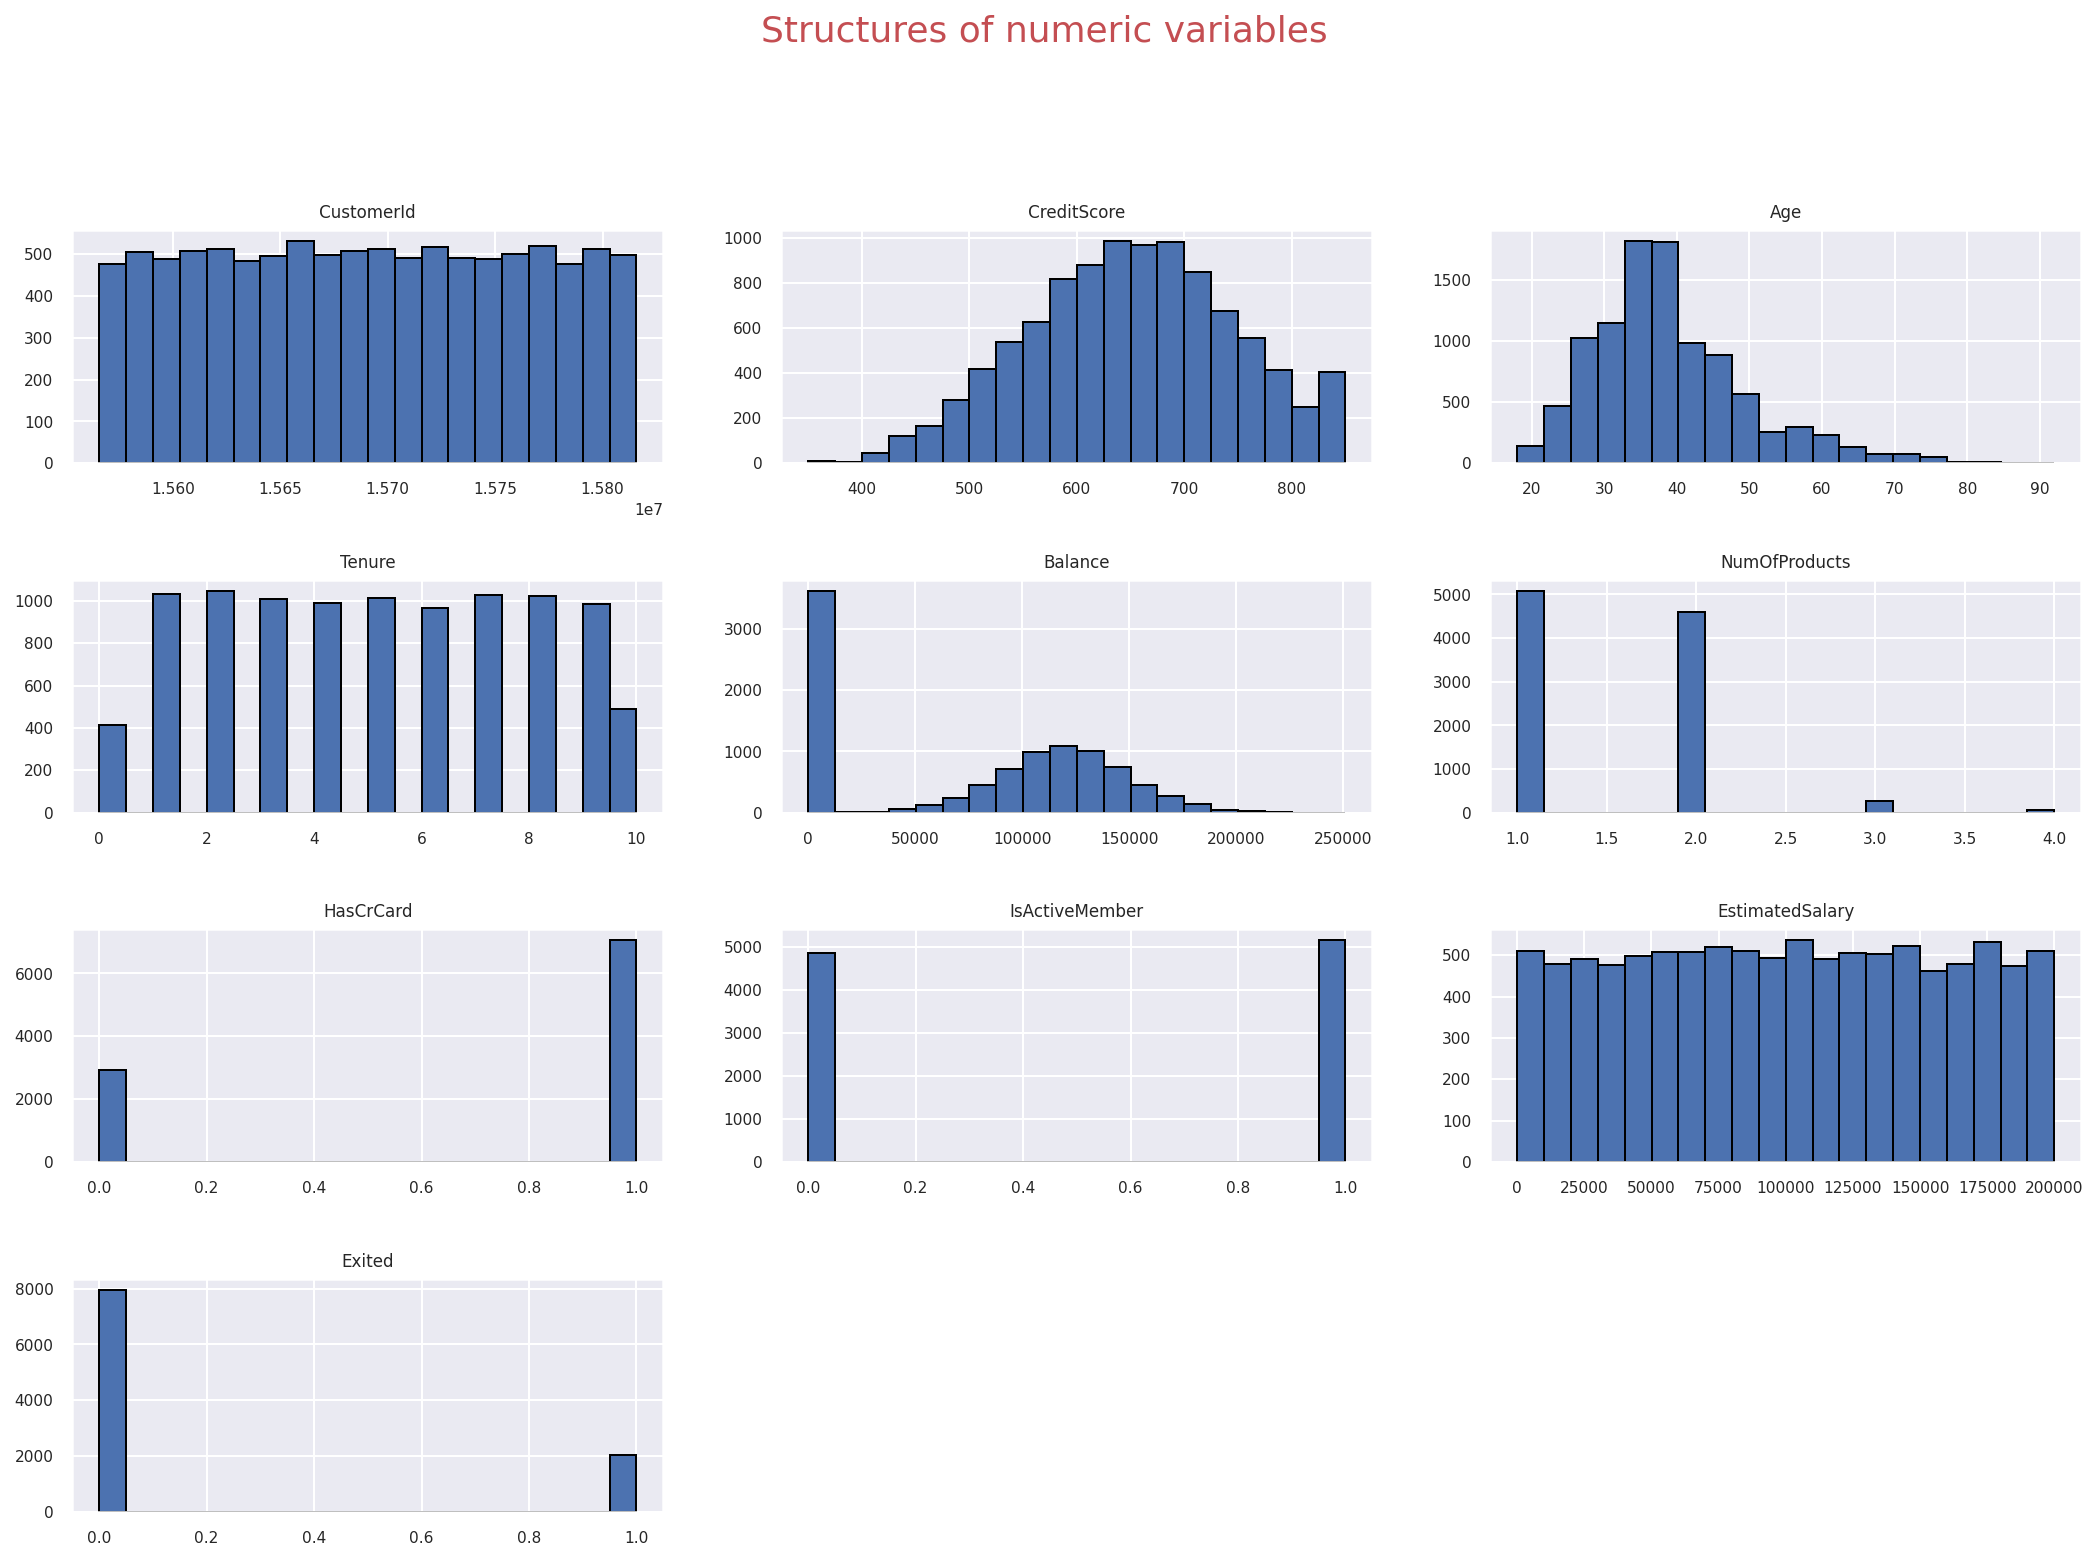

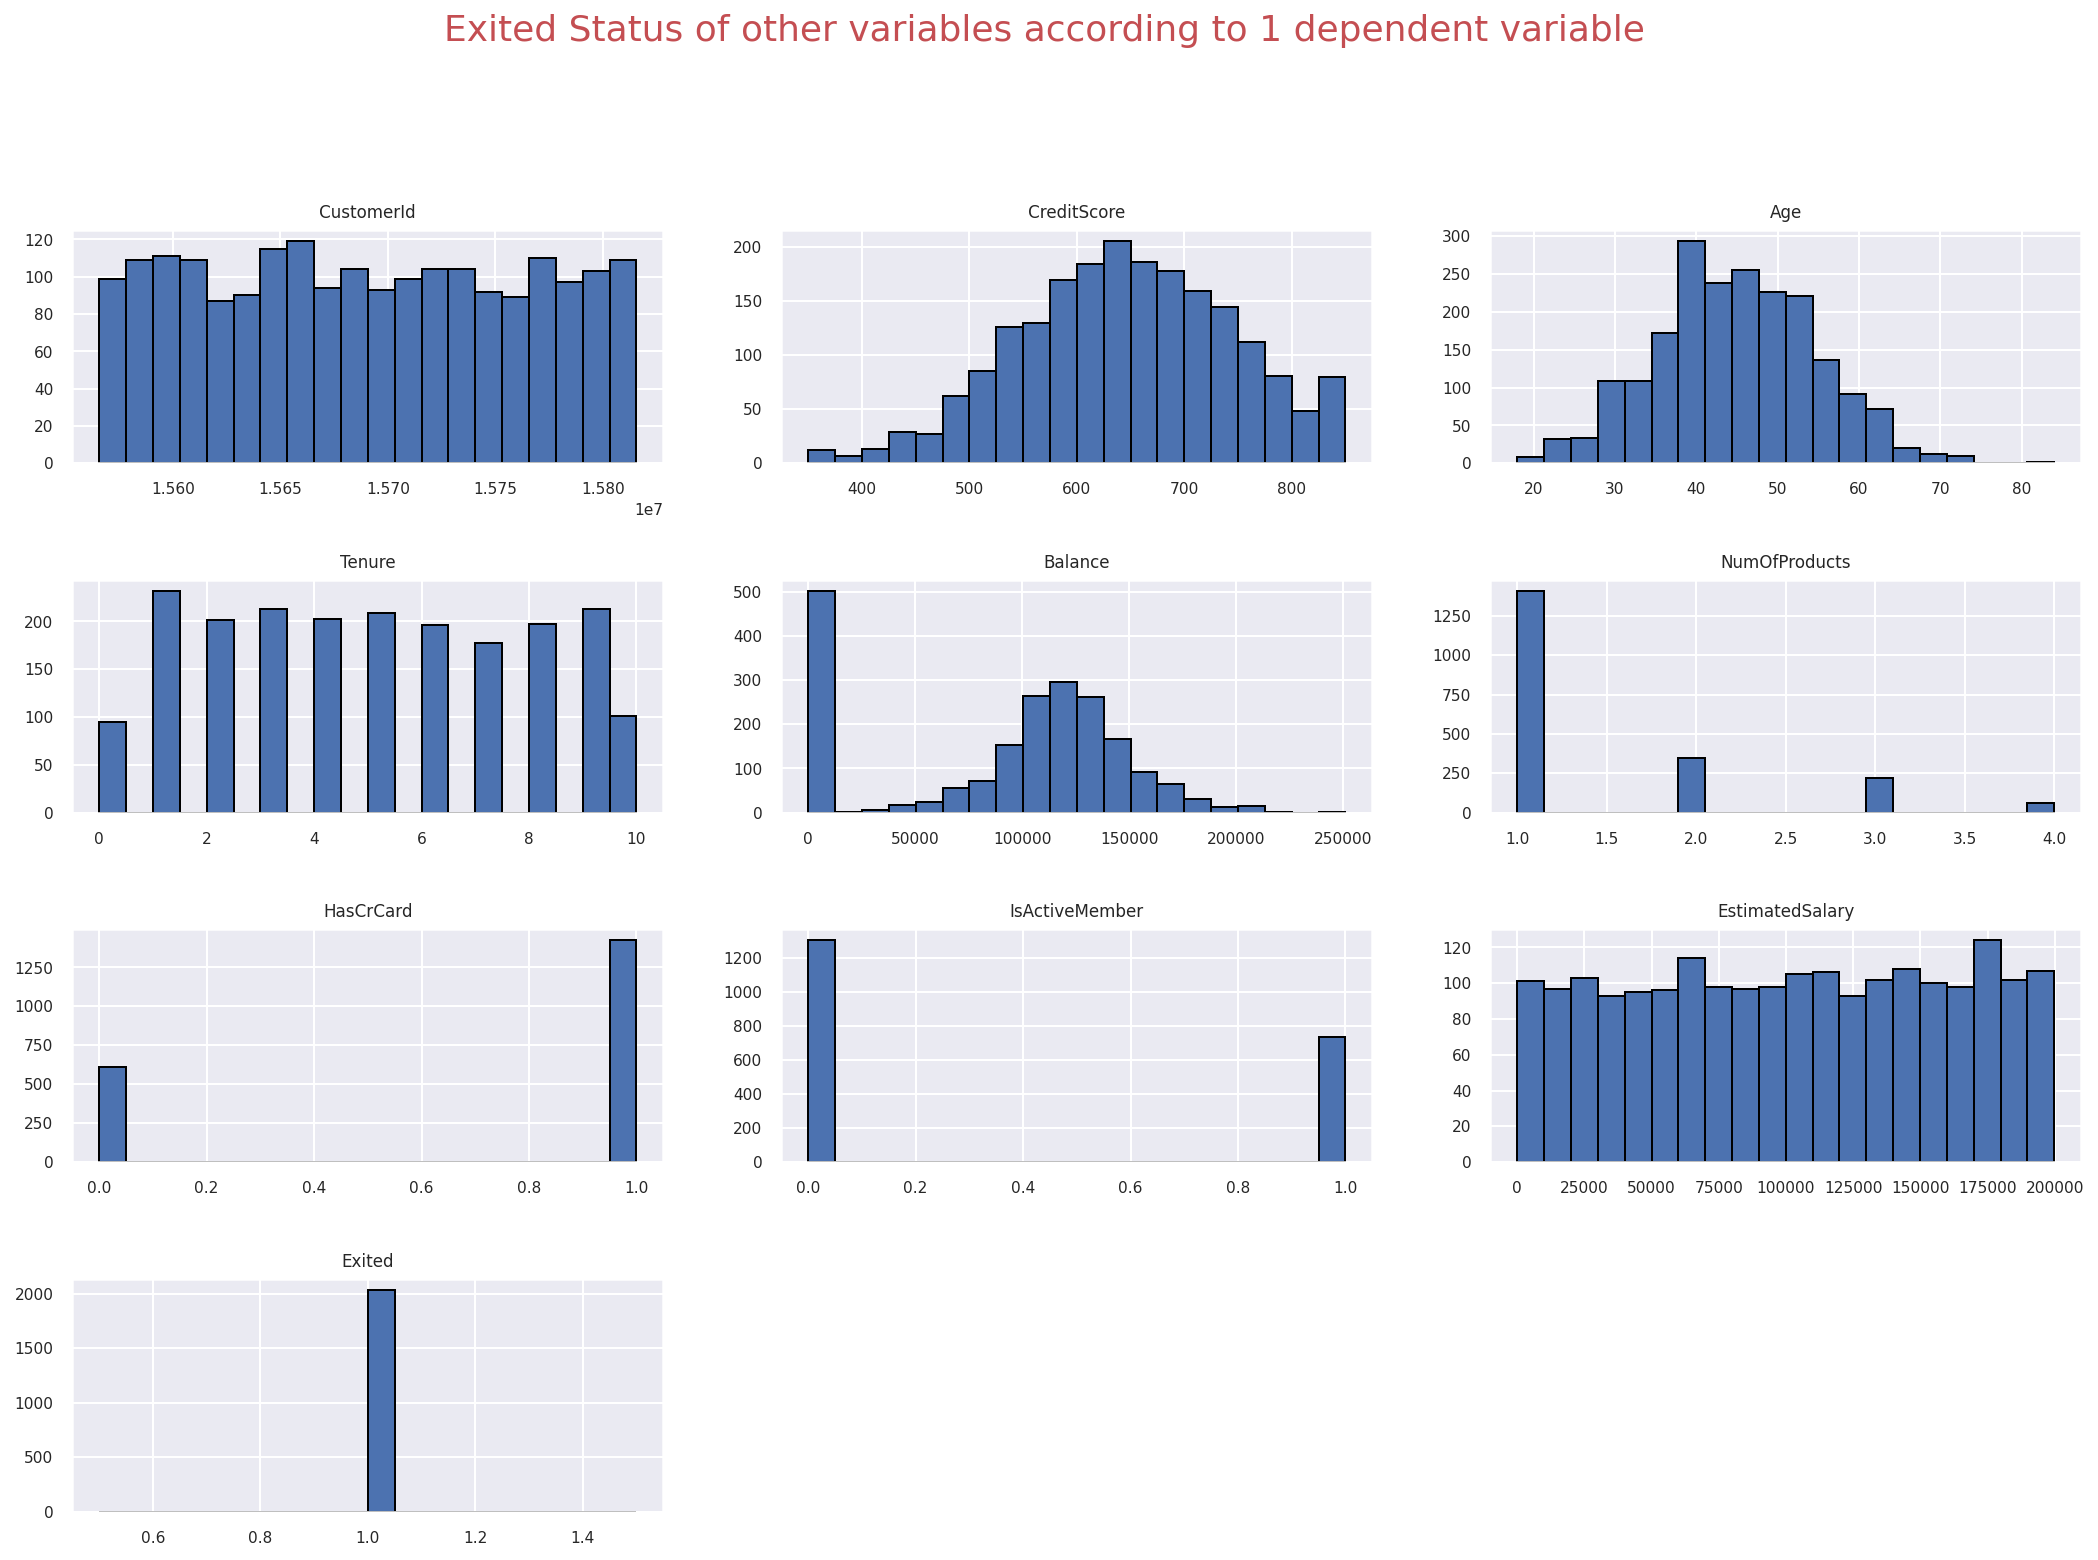

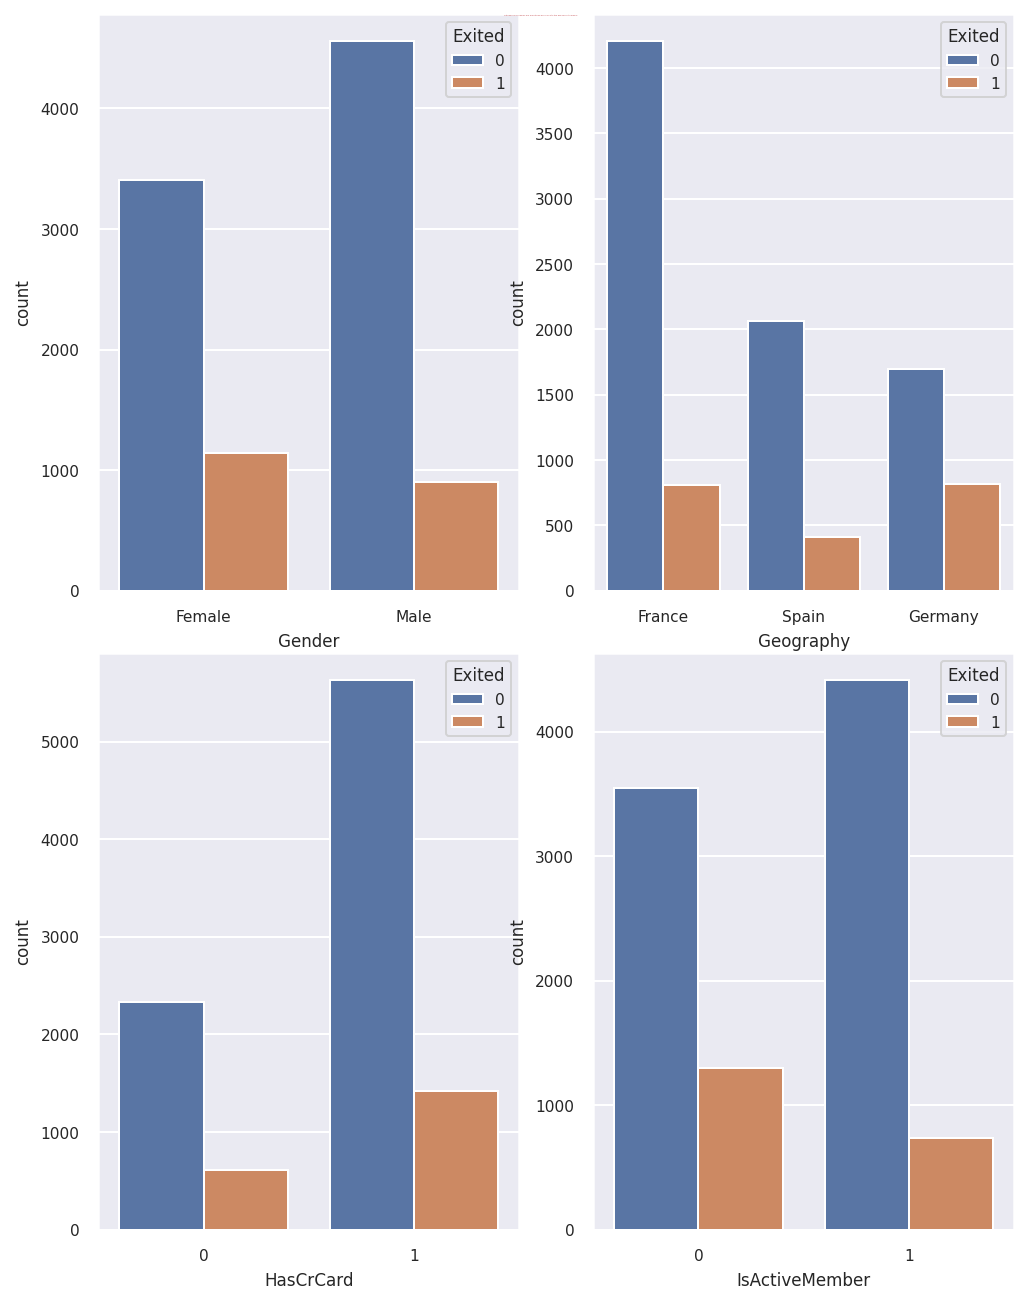

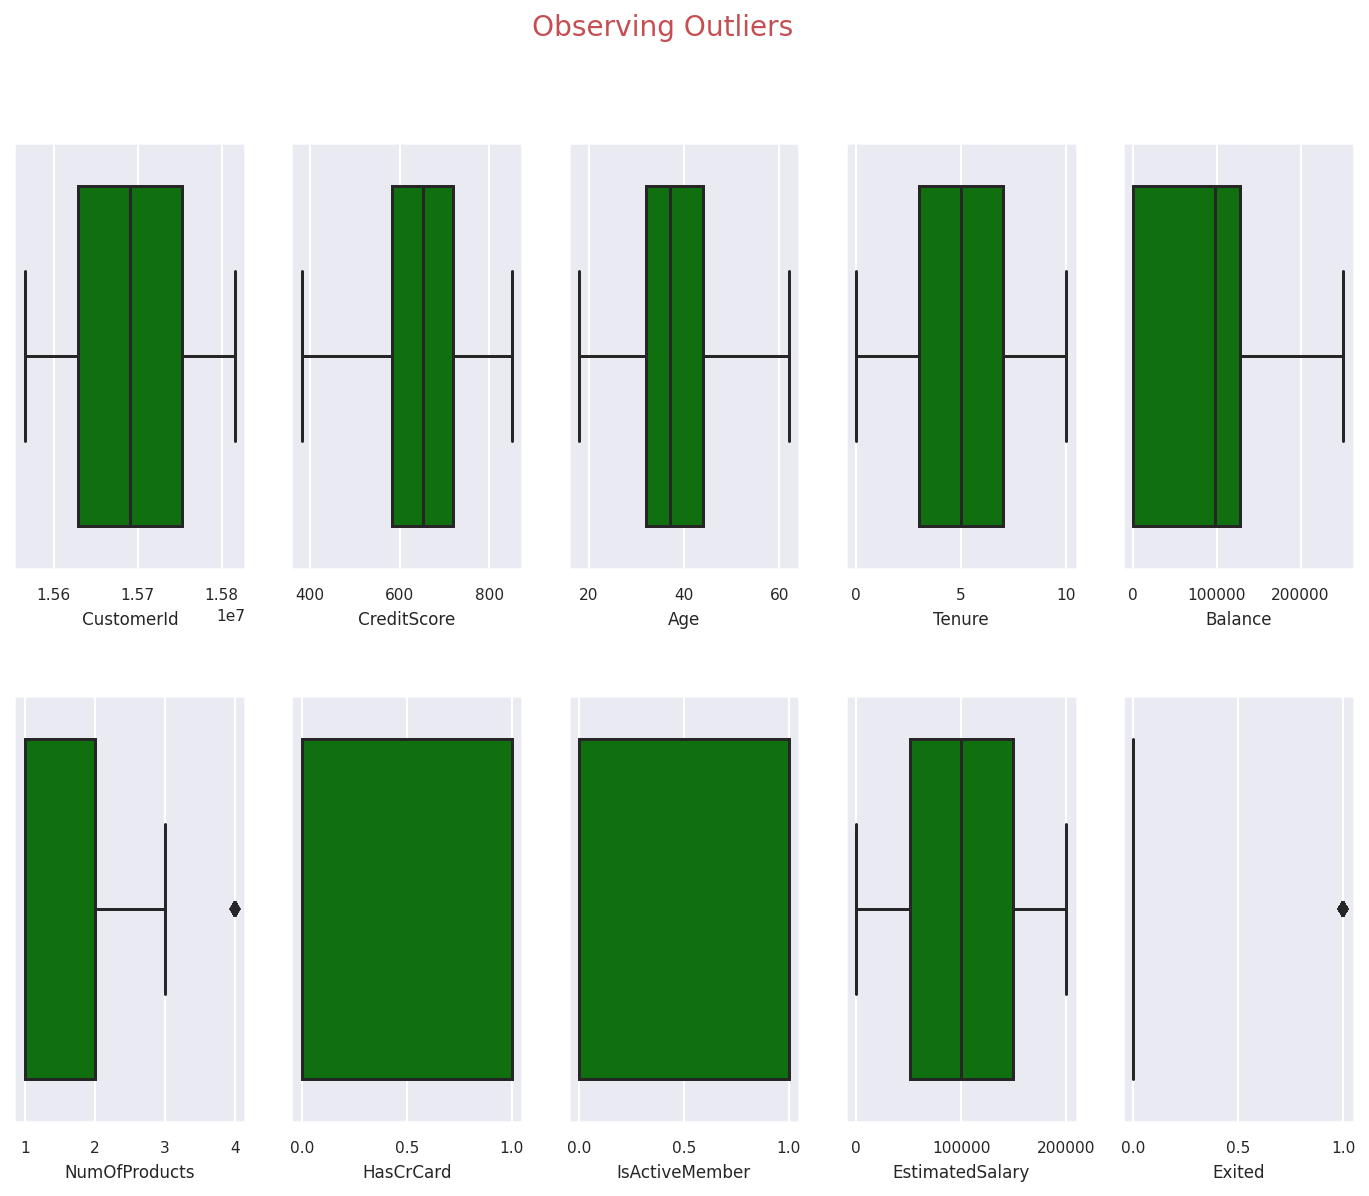

In [125]:
df_prep = data_prepare()

df_outlier = outlier_process(df = df_prep)


show_data_analysis(df_prep)
show_outliers(df = df_outlier)

Engenharia de atributos:

In [126]:
df_fe = feature_engineering(df = df_outlier)
df_fe.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_salary_rate,product_utilization_rate_by_year,tenure_rate_by_age,credit_score_rate_by_age,credit_score_rate_by_salary,credit_score_table,countries_monthly_average_salaries
RowNumber,,,,,,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2.00,0.00,1.00,1,1,101348.88,1,0.00,0.50,0.08,24.76,0.01,Fair,2.29
2,15647311,Hill,608,Spain,Female,41,1.00,83807.86,1.00,0,1,112542.58,0,0.74,1.00,0.04,25.33,0.01,Fair,4.16
3,15619304,Onio,502,France,Female,42,8.00,159660.80,3.00,1,0,113931.57,1,1.40,0.38,0.32,20.08,0.00,Poor,2.57


Encoding dos dados:

In [127]:
df_encoded = data_encoding(df_fe)
df_encoded.drop(['credit_card_situation', 'is_active_member'], axis=1, inplace=True)
df_encoded.head(3)

,Age,Balance,Exited,balance_salary_rate,product_utilization_rate_by_year,tenure_rate_by_age,credit_score_rate_by_age,credit_score_rate_by_salary,countries_monthly_average_salaries,HasCrCard,IsActiveMember,NumOfProducts,Tenure,gender_category,country_category,credit_score_category
0,42,0.00,1,0.00,0.50,0.08,24.76,0.01,2.29,1,1,1.00,2.00,0,0,1
1,41,83807.86,0,0.74,1.00,0.04,25.33,0.01,4.16,0,1,1.00,1.00,0,2,1
2,42,159660.80,1,1.40,0.38,0.32,20.08,0.00,2.57,1,0,3.00,8.00,0,0,3


Tabela de correlação:

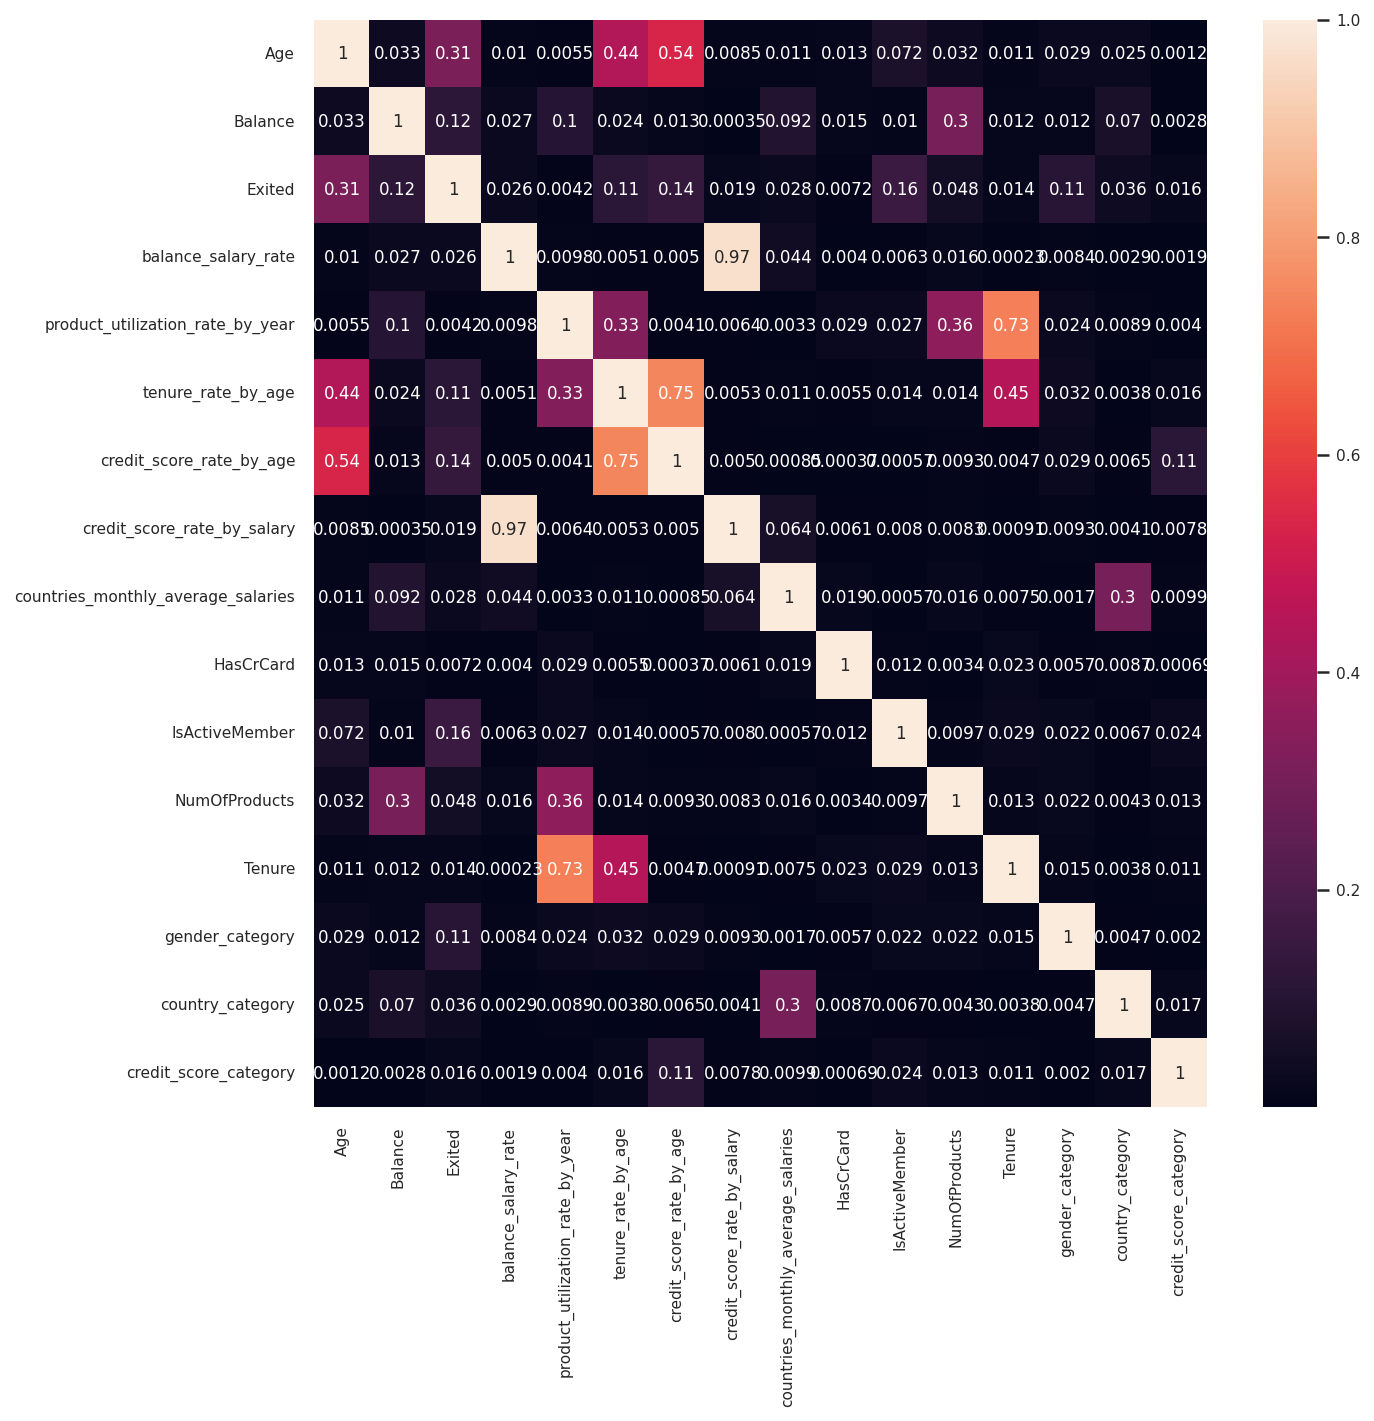

In [128]:
correlation = df_encoded.corr().abs()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True)
plt.show()

Lista dos atributos correlacionados em ordem decrescente:

In [129]:
corrs_results = df_encoded.corrwith(df_encoded["Exited"]).abs().nlargest(24)
corrs_results

Exited                               1.00
Age                                  0.31
IsActiveMember                       0.16
credit_score_rate_by_age             0.14
Balance                              0.12
tenure_rate_by_age                   0.11
gender_category                      0.11
NumOfProducts                        0.05
country_category                     0.04
countries_monthly_average_salaries   0.03
balance_salary_rate                  0.03
credit_score_rate_by_salary          0.02
credit_score_category                0.02
Tenure                               0.01
HasCrCard                            0.01
product_utilization_rate_by_year     0.00
dtype: float64

###Aplicação do modelo

In [30]:
# model_prepare test, train split 0.2
X_train, X_test, y_train, y_test = model_prepare(df_model = df_encoded)

1. Modelo de regressão logística

In [31]:
logr_model = LogisticRegression().fit(X_train,y_train)
y_pred = logr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred, digits=4))
print("Accuracy score of Logistic Regression: ", accuracy)

              precision    recall  f1-score   support

           0     0.8212    0.9805    0.8938      1588
           1     0.7019    0.1772    0.2829       412

    accuracy                         0.8150      2000
   macro avg     0.7616    0.5788    0.5884      2000
weighted avg     0.7966    0.8150    0.7680      2000

Accuracy score of Logistic Regression:  0.815


2. Treinamento do modelo

Para todos os modelos é feito isso (LogisticRegression, RandomForestClassifier, GradientBoostingClassifier, XGBClassifier e LGBMClassifier) 

In [32]:
training_result = data_training(X_train, X_test, y_train, y_test)
training_result

Learning rate set to 0.025031
0:	learn: 0.6723887	total: 51.5ms	remaining: 51.4s
1:	learn: 0.6528208	total: 55.7ms	remaining: 27.8s
2:	learn: 0.6346845	total: 59.8ms	remaining: 19.9s
3:	learn: 0.6214616	total: 64.1ms	remaining: 15.9s
4:	learn: 0.6069734	total: 68.2ms	remaining: 13.6s
5:	learn: 0.5924016	total: 72.6ms	remaining: 12s
6:	learn: 0.5784548	total: 77.3ms	remaining: 11s
7:	learn: 0.5648268	total: 81.5ms	remaining: 10.1s
8:	learn: 0.5528760	total: 85.7ms	remaining: 9.44s
9:	learn: 0.5413437	total: 89.8ms	remaining: 8.89s
10:	learn: 0.5303521	total: 94.2ms	remaining: 8.47s
11:	learn: 0.5194658	total: 98.5ms	remaining: 8.11s
12:	learn: 0.5110374	total: 103ms	remaining: 7.83s
13:	learn: 0.5014456	total: 107ms	remaining: 7.57s
14:	learn: 0.4934339	total: 112ms	remaining: 7.33s
15:	learn: 0.4854893	total: 116ms	remaining: 7.13s
16:	learn: 0.4786140	total: 120ms	remaining: 6.95s
17:	learn: 0.4711821	total: 125ms	remaining: 6.79s
18:	learn: 0.4649137	total: 129ms	remaining: 6.65s
19:

,model,accuracy_score,scale_method,0_precision,0_recall,1_precision,1_recall
6,LightGBM,0.87,NA,0.88,0.97,0.79,0.49
3,RF,0.86,NA,0.87,0.97,0.78,0.45
5,XGBoost,0.86,NA,0.87,0.97,0.79,0.44
7,CatBoost,0.86,NA,0.88,0.96,0.76,0.47
4,GBM,0.86,NA,0.87,0.97,0.78,0.44
1,KNN,0.84,NA,0.86,0.95,0.67,0.40
0,LOGR,0.81,NA,0.82,0.98,0.70,0.18
2,CART,0.79,NA,0.87,0.86,0.48,0.51


Analisando qual classificador é melhor para nosso caso:

In [33]:
training_result

,model,accuracy_score,scale_method,0_precision,0_recall,1_precision,1_recall
6,LightGBM,0.87,NA,0.88,0.97,0.79,0.49
3,RF,0.86,NA,0.87,0.97,0.78,0.45
5,XGBoost,0.86,NA,0.87,0.97,0.79,0.44
7,CatBoost,0.86,NA,0.88,0.96,0.76,0.47
4,GBM,0.86,NA,0.87,0.97,0.78,0.44
1,KNN,0.84,NA,0.86,0.95,0.67,0.40
0,LOGR,0.81,NA,0.82,0.98,0.70,0.18
2,CART,0.79,NA,0.87,0.86,0.48,0.51


###Melhorando o modelo (tuning)

1. XGBoost Tuning

In [34]:
xgb_model=XGBClassifier(silent=0, learning_rate=0.23, max_delta_step=5,
                            objective='reg:logistic',n_estimators=92, 
                            max_depth=5, eval_metric="logloss", gamma=3,base_score=0.5)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test,y_pred,digits=2))
print("Accuracy score of Tuned XGBoost Regression: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1588
           1       0.78      0.49      0.60       412

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.85      2000

Accuracy score of Tuned XGBoost Regression:  0.8655


2. Random Forest Tuning

In [35]:
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators' : [50,100], 'min_samples_split': [3, 5, 6, 7]}
randFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5, refit = True, verbose = 0)
randFor_grid.fit(X_train,y_train)
best_model(randFor_grid)

0.8603247342088804
{'max_depth': 8, 'max_features': 9, 'min_samples_split': 3, 'n_estimators': 50}
RandomForestClassifier(max_depth=8, max_features=9, min_samples_split=3,
                       n_estimators=50)


Using the parameters and get final version accuracy score.
Usando os parâmetros e pegando a versão final do score da acurácia 

In [36]:
rnd_model = RandomForestClassifier(max_depth=8, max_features=6, min_samples_split=6,n_estimators=50)
rnd_model.fit(X_train, y_train)
y_pred = rnd_model.predict(X_test)
print(classification_report(y_test,y_pred,digits=2))
print("Accuracy score of tuned Random Forest model: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1588
           1       0.81      0.42      0.55       412

    accuracy                           0.86      2000
   macro avg       0.84      0.70      0.74      2000
weighted avg       0.86      0.86      0.84      2000

Accuracy score of tuned Random Forest model:  0.8605


3. LightGBM Tuning

In [37]:
lgbm_model = LGBMClassifier(silent = 0, learning_rate = 0.09, max_delta_step = 2, n_estimators = 100, boosting_type = 'gbdt',
                            max_depth = 10, eval_metric = "logloss", gamma = 3, base_score = 0.5)
lgbm_model.fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=2))
print("Accuracy score of tuned LightGBM model: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1588
           1       0.79      0.49      0.61       412

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000

Accuracy score of tuned LightGBM model:  0.868


###Matriz de confusão

Confusion matrix, without normalization
[[1533   55]
 [ 209  203]]
True Negatives:  1533
False Positives:  55
False Negatives:  209
True Positives:  203


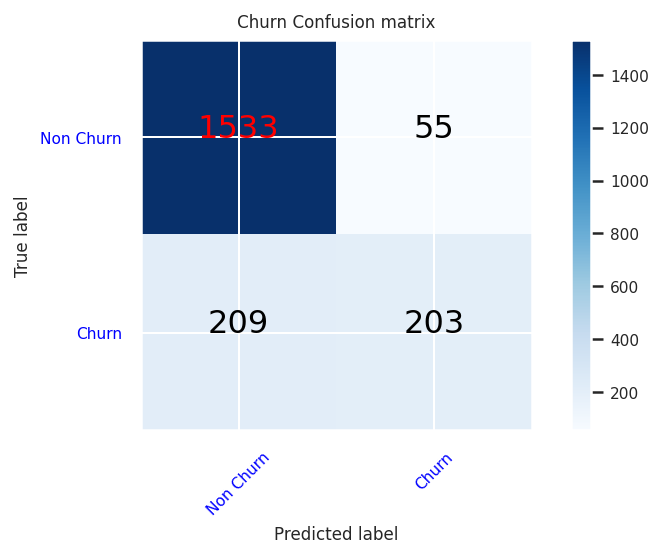

In [39]:
cfm = confusion_matrix(y_test, y_pred=y_pred)
plot_confusion_matrix(cfm, classes=['Non Churn','Churn'],
                      title='Churn Confusion matrix')


tn, fp, fn, tp = cfm.ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

###ROC Curve

In [43]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)


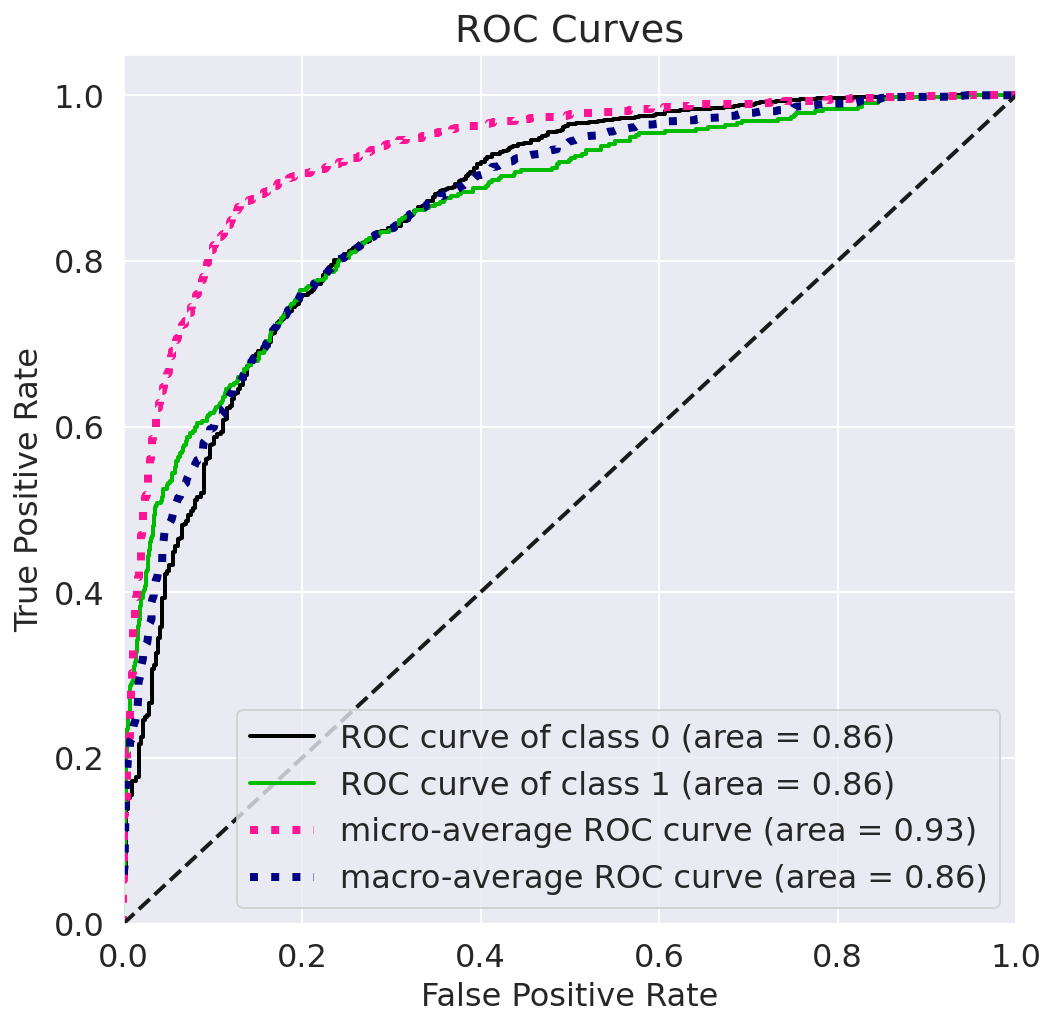

In [44]:
import scikitplot as skplt
y_pred_proba = lgbm_model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba, figsize=(8,8))

plt.show()

###Peso dos atributos (Feature Importance)

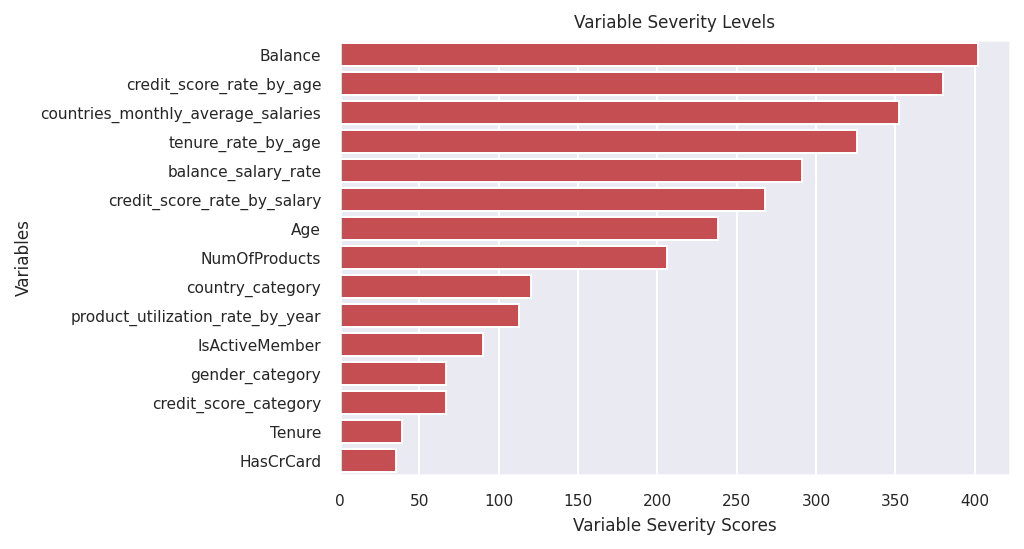

In [38]:
feature_index = df_encoded.loc[:, df_encoded.columns != dependent_variable_name]

feature_importance = pd.Series(lgbm_model.feature_importances_, 
                               index=feature_index.columns).sort_values(ascending=False)
sns.barplot(x = feature_importance, y = feature_importance.index, color='r', saturation=1)
plt.xlabel('Variable Severity Scores')
plt.ylabel('Variables')
plt.title('Variable Severity Levels')
plt.show()

###Conclusão

Após analisar chegamos nas seguintes conclusões:

- A maioria dos clientes que usam o produto 3 e 4 pararam de trabalhar com o banco. E além disso, todos os clientes que usaram o produto 4 já se desligaram.
- Clientes com idade entre 40 e 65 anos são mais propícios a se desligar do banco.
- Aqueles que tinha um score de crédito abaixo de 450 tinham altas chances de sair do banco.
- Predições foram feitas com um total de 8 modelos de classificadores. O modelo com maior acurácia no nosso caso foi método de LightGBM.
- Acurácia e validação cruzada tiveram seus resultados calculados em cada modelo.